In [5]:
# Copyright 2025 Andrew Lehr
# The MIT License

# Spatially heterogeneous inhibition projects sequential activity onto unique neural subspaces
#### Lehr, Kumar, and Tetzlaff

## Fig 2: Selective inhibition preserves sequence generation


In [1]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as cPickle
import os.path as path
import os
from scipy import interpolate
from scipy.optimize import curve_fit
from tabulate import tabulate

In [2]:
from submanifolds.experiments import SubspaceExperiment
from submanifolds.ringnet import Plot
from submanifolds.utils import DataManager

## Simulations

Static parameters and iterated parameters are defined and passed to an Experiment object. The Experiment iterates through the parameter space. For each point in the space, it creates a parameter and network object, runs the simulation for that point in the paramter space, and saves the data to file.

In [3]:
simulate = 0 # flag to run simulations

In [4]:
stim = 'transient'
params_to_set = {'stim': [stim],
                 'type': ['projection'],
                 }

rescale_flag = [True, False]
shift_percent = np.arange(0,0.16,.01).round(3) #np.arange(0,0.11,.01).round(2)
perc_selectivity = np.arange(0,1,0.05).round(2)
seeds = np.arange(0,10,1) 

# tuple of static parameters for referencing
static_parameters = tuple(val[0] for val in params_to_set.values())

params_to_iterate = {'rescale': rescale_flag,
                     'p_inh': perc_selectivity,
                     'seed': seeds,
                     'shift_percent': shift_percent
                     }

In [5]:
if simulate == 1:
    print(params_to_iterate)
    exp = SubspaceExperiment(params_to_set, params_to_iterate)
    exp.iterate()

## Analysis

### Preamble

In [6]:
# fill in name of the folder where data is stored (within "data/" folder)
exp_data_dir = 'subspace_exp_2025-04-15_08:53:39'

In [7]:
manage = DataManager(exp_data_dir)

In [8]:
# load an example data set to get neuron population size (N) and number of time stamps (T)
# for this experiment N and T are the same for all simulations
parameter_setting = (True, 0, 0, 0) + static_parameters
net = manage.load_data(parameter_setting)

In [9]:
N = net.params.N
T = net.params.T
n_rescale = len(rescale_flag)
n_perc_sel = len(perc_selectivity)
n_shifts = len(shift_percent)
n_seeds = len(seeds)

In [10]:
colors = ['#586ba4', '#f68e5f', '#f5dd90', '#324376', '#f76c5e', 
          '#067d7a', '#77c1b3', '#f3c759', '#ed7364', '#b63653',
          '#6d2a2a', '#361a1a', '#191414', '#465865', '#928876',
          '#fc9234', '#fd6626', '#44867d', '#177070', '#404a50']

palette = ['#C47475', '#7F9CB0'] # ['#009E92', '#7F9CB0'] #['#1D7874', '#99A88C']

In [11]:
sns.set_style('ticks')  # seaborn style
ticksize = 16           # set tick font size
labelsize = 20          # set plot label sizes

In [12]:
# Figure storage
fig_top_dir = manage.root + 'figures/'
fig_dir = fig_top_dir + 'figure_2/'

if not os.path.isdir(fig_top_dir):
    os.mkdir(fig_top_dir)
    print('Created ' + fig_top_dir)

if not os.path.isdir(fig_dir):
    os.mkdir(fig_dir)
    print('Created ' + fig_dir)
    
save_figs_flag = 1

In [13]:
# Figure storage
fig_dir_supplement = manage.root + 'figures/supplementary_figures/'
if not os.path.isdir(fig_dir_supplement):
    os.mkdir(fig_dir_supplement)
    print('Created ' + fig_dir_supplement)
else:
    print(fig_dir_supplement + 'already exists')

/home/andrew/Documents/projects/submanifolds/subspace_projections_with_selective_inhibition/rate_network/figures/supplementary_figures/already exists


### Load eigendecomposition data
Returns data with following shapes (see next cell):

In [14]:
#evals_W = defaultdict(dict) 
#evals_PW = defaultdict(dict) 
#evals_Wr = defaultdict(dict) 

#val_W_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#val_W_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)
#val_PW_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)
#val_Wr_argmax = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds), dtype=int)

#val_W_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max_real = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#val_W_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_PW_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))
#val_Wr_max_imag = np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds))

#vec_W_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))
#vec_PW_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))
#vec_Wr_max = 1j * np.zeros((n_rescale, n_perc_sel, n_shifts, n_seeds, N))

In [15]:
eigendecomposition_data = manage.load_eigendecomposition_data()

for key in eigendecomposition_data.keys():
        exec(key + ' = eigendecomposition_data[key]')
        print('Extracted ' + key)

Extracted evals_W
Extracted evals_PW
Extracted evals_Wr
Extracted val_W_max
Extracted val_PW_max
Extracted val_Wr_max
Extracted val_W_argmax
Extracted val_PW_argmax
Extracted val_Wr_argmax
Extracted val_W_max_real
Extracted val_PW_max_real
Extracted val_Wr_max_real
Extracted val_W_max_imag
Extracted val_PW_max_imag
Extracted val_Wr_max_imag
Extracted vec_W_max
Extracted vec_PW_max
Extracted vec_Wr_max


# Figure 2

In [16]:
# scaling
rescale_val = True
rescale_ind = rescale_flag.index(rescale_val) # 0 for rescaled, 1 for not rescaled weights

# not rescaled
no_rescale_val = False
no_rescale_ind = rescale_flag.index(no_rescale_val)

# percent selective inhibition
perc_val = .6
perc_ind = np.where(perc_selectivity==perc_val)[0][0]

# no selective inhibition
no_perc_val = 0
no_perc_ind = np.where(perc_selectivity==no_perc_val)[0][0]

# shift
shift_val = 0.1
shift_ind = np.where(shift_percent==shift_val)[0][0]

# no shift
no_shift_val = 0
no_shift_ind = np.where(shift_percent==no_shift_val)[0][0]

# seed
seed_val = 0
seed_ind = np.where(seeds==seed_val)[0][0]

### Table of parameter values

In [17]:
parameter_setting = (True, 0, 0, 0) + static_parameters
net = manage.load_data(parameter_setting)

In [18]:
print(tabulate([['$N$',      str(N),                                                             'number of neurons'],
                ['$T$',      str(T),                                                             'number of time steps'],
                ['$w_E$',    '$\\frac{' + str(np.round(np.max(net.W),4)) + '}{' + '1-p_{inh}}$', 'maximum excitatory weight'],
                ['$\sigma$', str(int(net.params.sigma)),                                         'standard deviation of excitatory Gaussian kernel'],
                ['$s$',      str(int(N*shift_val)),                                              'shift magnitude of excitatory Gaussian kernel'],
                ['$w_I$',    '$\\frac{' + str(np.round(np.abs(np.min(net.W)),4)) + '}{' + '1-p_{inh}}$', 'global inhibitory weight'],
                ['$x_c$',    str(int(net.params.initial_bump_center)),                           'initial bump center'],
                ['$\sigma_0$',    str(int(net.params.initial_bump_std)),                         'initial bump width (standard deviation)'],
                ['$r_{max}(t=0)$',    str(net.params.initial_r.max()),                           'initial bump amplitude'],
                ['$p_{inh}$',      '\{' + ', '.join(manage.params_to_iterate['p_inh'].astype(str)) + '\}',  'fraction silenced']
               ], 
               headers=['parameter', 'value', 'description'],
               numalign='center', stralign='center', tablefmt='latex_raw'))

\begin{tabular}{ccc}
\hline
   parameter    &                                                      value                                                       &                   description                    \\
\hline
      $N$       &                                                       1000                                                       &                number of neurons                 \\
      $T$       &                                                        25                                                        &               number of time steps               \\
     $w_E$      &                                            $\frac{0.0047}{1-p_{inh}}$                                            &            maximum excitatory weight             \\
    $\sigma$    &                                                       150                                                        & standard deviation of excitatory Gaussian kernel \\
      $s$       &                       

In [19]:
print(tabulate([['$N$',      str(N),                                                           'number of neurons'],
                ['$T$',      str(T),                                                           'number of time steps'],
                ['$w_E$',    str(np.round(np.max(net.W),4)) + '$/(1-p_{inh})$',                'maximum excitatory weight'],
                ['$\sigma$', str(int(net.params.sigma)),                                       'standard deviation of excitatory Gaussian kernel'],
                ['$s$',      str(int(N*shift_val)),                                            'shift magnitude of excitatory Gaussian kernel'],
                ['$w_I$',    str(np.round(np.abs(np.min(net.W)),4)) + '$/(1-p_{inh})$',        'global inhibitory weight'],
                ['$x_c$',    str(int(net.params.initial_bump_center)),                         'initial bump center'],
                ['$\sigma_0$',    str(int(net.params.initial_bump_std)),                       'initial bump width (standard deviation)'],
                ['$r_{max}(t=0)$',    str(net.params.initial_r.max()),                         'initial bump amplitude'],
                ['$p_{inh}$',      '\{' + ', '.join(manage.params_to_iterate['p_inh'].astype(str)) + '\}',                                'fraction silenced']
               ], 
               headers=['parameter', 'value', 'description'],
               numalign='center', stralign='center', tablefmt='latex_raw'))

\begin{tabular}{ccc}
\hline
   parameter    &                                                      value                                                       &                   description                    \\
\hline
      $N$       &                                                       1000                                                       &                number of neurons                 \\
      $T$       &                                                        25                                                        &               number of time steps               \\
     $w_E$      &                                               0.0047$/(1-p_{inh})$                                               &            maximum excitatory weight             \\
    $\sigma$    &                                                       150                                                        & standard deviation of excitatory Gaussian kernel \\
      $s$       &                       

## Fig 2c: Activity

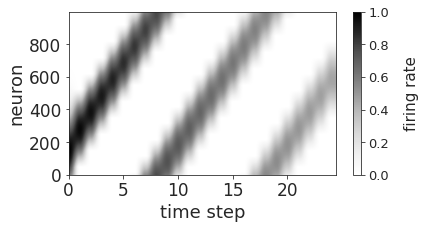

In [20]:
fname = 'activity_no_inh.pdf'

# rescale, percent inh, seed, shift 
parameter_setting = (rescale_val, no_perc_val, seed_val, shift_val) + static_parameters
net = manage.load_data(parameter_setting)

plotter = Plot()
if save_figs_flag:
    plotter.activity_raster(net.R, fig_dir+fname)
else:
    plotter.activity_raster(net.R)

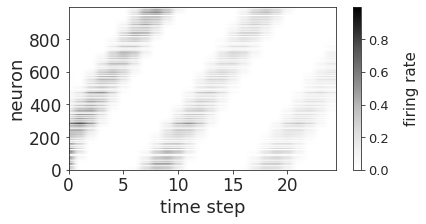

In [21]:
fname = 'activity_inh_60_perc.pdf'

# rescale, percent inh, seed, shift 
parameter_setting = (rescale_val, perc_val, seed_val, shift_val) + static_parameters
net = manage.load_data(parameter_setting)

plotter = Plot()
if save_figs_flag:
    plotter.activity_raster(net.R, fig_dir+fname)
else:
    plotter.activity_raster(net.R)

## Fig 2b: Weight matrix

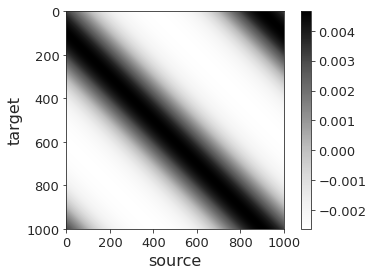

In [22]:
fname = 'weight_matrix.pdf'
# rescale, percent inh, seed, shift 
parameter_setting = (rescale_val, no_perc_val, seed_val, shift_val) + static_parameters
net = manage.load_data(parameter_setting)

plotter = Plot()
if save_figs_flag:
    plotter.weight_matrix(net.W, fig_dir+fname)
else:
    plotter.weight_matrix(net.W)

In [23]:
fname = 'weight_matrix.pdf'
# rescale, percent inh, seed, shift 
parameter_setting = (rescale_val, no_perc_val, seed_val, shift_val) + static_parameters
net = manage.load_data(parameter_setting)

plotter = Plot()
if save_figs_flag:
    #plotter.weight_matrix(net.W, fig_dir+fname)
    pass
else:
    plt.imshow(net.W, cmap='seismic', vmin=-np.max(net.W), vmax=np.max(net.W))
    plt.colorbar()

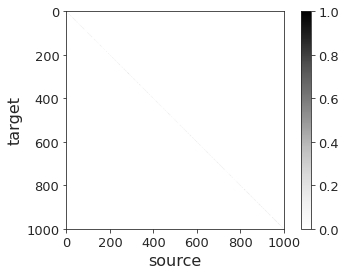

In [24]:
fname = 'P_matrix.pdf'

# rescale, percent inh, seed, shift 
parameter_setting = (rescale_val, perc_val, seed_val, shift_val) + static_parameters
net = manage.load_data(parameter_setting)

plotter = Plot()
if save_figs_flag:
    plotter.weight_matrix(np.diag(net.P), fig_dir+fname)
else:
    plotter.weight_matrix(np.diag(net.P))

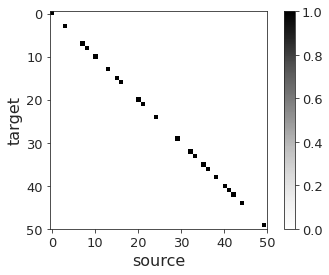

In [25]:
fname = 'P_matrix_zoomed.pdf'

# rescale, percent inh, seed, shift 
parameter_setting = (rescale_val, perc_val, seed_val, shift_val) + static_parameters
net = manage.load_data(parameter_setting)

plotter = Plot()
if save_figs_flag:
    plotter.weight_matrix(np.diag(net.P[0:50]), fig_dir+fname, 10)
else:
    plotter.weight_matrix(np.diag(net.P[0:50]), tick_sep=10)

## Fig 2d: Eigenvalues

#### Plot of eigenvalues in complex plane

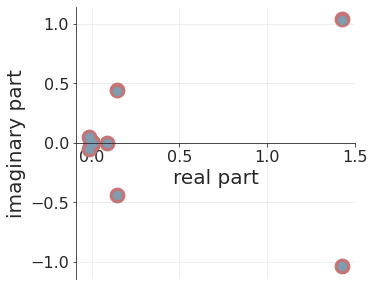

In [26]:
fname = 'eigenspectrum.pdf'

fig, ax = plt.subplots(figsize=(5,5))

# eigenvalues of weight matrix, W
plt.scatter(evals_W[no_rescale_ind, perc_ind, shift_ind, seed_ind].real, 
            evals_W[no_rescale_ind, perc_ind, shift_ind, seed_ind].imag, s=220, c=palette[0], label='W')

# eigenvalues of PW 
plt.scatter(evals_PW[rescale_ind, perc_ind, shift_ind, seed_ind].real, 
            evals_PW[rescale_ind, perc_ind, shift_ind, seed_ind].imag, s=70, c=palette[1], label='PW')

# formatting plot
plt.xlabel('real part', fontsize=labelsize)
plt.ylabel('imaginary part', fontsize=labelsize)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('center')

plt.grid(alpha=0.4)
#plt.legend(fontsize=labelsize, frameon=False)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

#### (supplement) Magnitude of eigenvalues

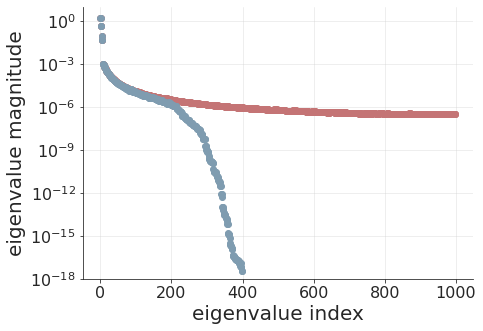

In [27]:
fname = 'eigenvalue_magnitude.pdf'

fig, ax = plt.subplots(figsize=(7,5))

# eigenvalue magnitude of weight matrix, W
plt.plot(abs(evals_W[no_rescale_ind, perc_ind, shift_ind, seed_ind]), 'o', c=palette[0], label='W')

# eigenvalue magnitude of PW
plt.plot(abs(evals_PW[rescale_ind, perc_ind, shift_ind, seed_ind]), 'o', c=palette[1], label='PW')

# formatting plot
#plt.xlim(-2, 1001)
plt.ylim(10**-18, 10)
plt.xlabel('eigenvalue index', fontsize=labelsize)
plt.ylabel('eigenvalue magnitude', fontsize=labelsize)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
plt.yscale('log')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)
#plt.legend(fontsize=labelsize, frameon=False)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

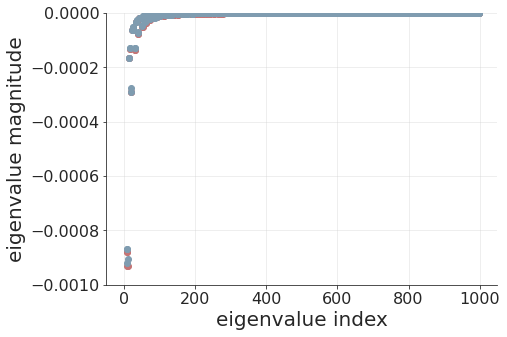

In [28]:
fname = 'eigenvalue_magnitude.pdf'

fig, ax = plt.subplots(figsize=(7,5))

# eigenvalue magnitude of weight matrix, W
plt.plot((evals_W[no_rescale_ind, perc_ind, shift_ind, seed_ind]).real, 'o', c=palette[0], label='W')

# eigenvalue magnitude of PW
plt.plot((evals_PW[rescale_ind, perc_ind, shift_ind, seed_ind]).real, 'o', c=palette[1], label='PW')

# formatting plot
#plt.xlim(-2, 1001)
plt.ylim(-0.001, 0)
plt.xlabel('eigenvalue index', fontsize=labelsize)
plt.ylabel('eigenvalue magnitude', fontsize=labelsize)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
#plt.yscale('log')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)
#plt.legend(fontsize=labelsize, frameon=False)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

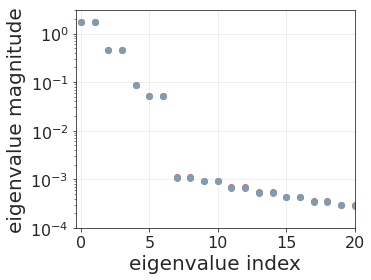

In [29]:
fname = 'eigenvalue_magnitude_zoomed.pdf'

fig, ax = plt.subplots(figsize=(5,4))

# zoom in, eigenvalue magnitude of weight matrix W
plt.plot(abs(evals_W[no_rescale_ind, perc_ind, shift_ind, seed_ind]), 'o', c=palette[0], label='W')

# zoom in, eigenvalue magnitude of PW
plt.plot(abs(evals_PW[rescale_ind, perc_ind, shift_ind, seed_ind]), 'o', c=palette[1], label='PW')

# format plot
plt.xlim(-0.4, 20)
plt.ylim(10**-4, 3)
plt.xlabel('eigenvalue index', fontsize=labelsize)
plt.ylabel('eigenvalue magnitude', fontsize=labelsize)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
plt.yscale('log')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)
#plt.legend(fontsize=labelsize, frameon=False)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

## Fig 2e: Magnitude of eigenvalues as a function of percent inhibited

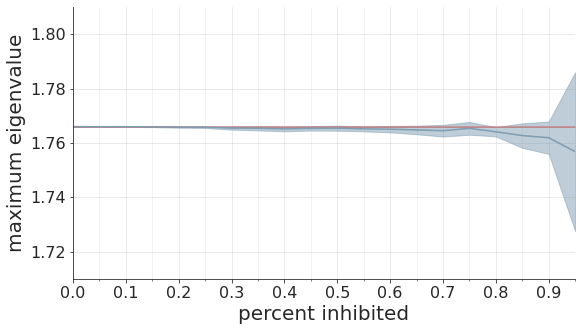

In [30]:
fname = 'eigenvalue_magnitude_vs_perc_inh.pdf'

fig, ax = plt.subplots(figsize=(9,5))
#plt.plot(perc_selectivity, np.ones(n_perc_sel), linestyle='--', color='dimgrey')

# W
plt.plot(perc_selectivity, val_W_max[no_rescale_ind,:,shift_ind,:].mean(axis=1), color=palette[0], alpha=0.8)
plt.fill_between(perc_selectivity, 
                 val_W_max[no_rescale_ind,:,shift_ind,:].mean(axis=1)-val_W_max[no_rescale_ind,:,shift_ind,:].std(axis=1),
                 val_W_max[no_rescale_ind,:,shift_ind,:].mean(axis=1)+val_W_max[no_rescale_ind,:,shift_ind,:].std(axis=1),
                 color=palette[0],
                 alpha=0.5)

# PW
plt.plot(perc_selectivity, val_PW_max[rescale_ind,:,shift_ind,:].mean(axis=1), color=palette[1])
plt.fill_between(perc_selectivity, 
                 val_PW_max[rescale_ind,:,shift_ind,:].mean(axis=1)-val_PW_max[rescale_ind,:,shift_ind,:].std(axis=1),
                 val_PW_max[rescale_ind,:,shift_ind,:].mean(axis=1)+val_PW_max[rescale_ind,:,shift_ind,:].std(axis=1),
                 color=palette[1],
                 alpha=0.5)

# formatting
plt.xlabel('percent inhibited', fontsize=labelsize)
plt.ylabel('maximum eigenvalue', fontsize=labelsize)
plt.xticks(np.arange(0,1, 0.1))
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)
plt.xlim(0,0.95)
plt.ylim(1.71,1.81)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 1, 0.1)
minor_ticks = np.arange(0, 1, 0.05)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
ax.grid(which='minor', alpha=0.3)
ax.grid(which='major', alpha=0.5)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

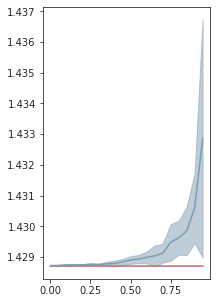

In [31]:
plt.figure(figsize=(3,5))
#plt.plot(perc_selectivity, np.ones(n_perc_sel), linestyle='--', color='dimgrey')

plt.plot(perc_selectivity, val_W_max_real[no_rescale_ind,:,shift_ind,:].mean(axis=1), color=palette[0])
plt.fill_between(perc_selectivity, 
                 val_W_max_real[no_rescale_ind,:,shift_ind,:].mean(axis=1)-val_W_max_real[no_rescale_ind,:,shift_ind,:].std(axis=1),
                 val_W_max_real[no_rescale_ind,:,shift_ind,:].mean(axis=1)+val_W_max_real[no_rescale_ind,:,shift_ind,:].std(axis=1),
                 color=palette[0],
                 alpha=0.5)

plt.plot(perc_selectivity, val_PW_max_real[rescale_ind,:,shift_ind,:].mean(axis=1), color=palette[1])
plt.fill_between(perc_selectivity, 
                 val_PW_max_real[rescale_ind,:,shift_ind,:].mean(axis=1)-val_PW_max_real[rescale_ind,:,shift_ind,:].std(axis=1),
                 val_PW_max_real[rescale_ind,:,shift_ind,:].mean(axis=1)+val_PW_max_real[rescale_ind,:,shift_ind,:].std(axis=1),
                 color=palette[1],
                 alpha=0.5)

plt.show()

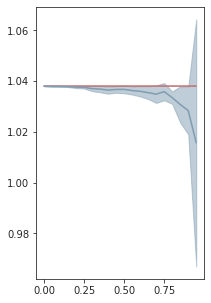

In [32]:
plt.figure(figsize=(3,5))
#plt.plot(perc_selectivity, np.ones(n_perc_sel), linestyle='--', color='dimgrey')

plt.plot(perc_selectivity, val_W_max_imag[no_rescale_ind,:,shift_ind,:].mean(axis=1), color=palette[0])
plt.fill_between(perc_selectivity, 
                 val_W_max_imag[no_rescale_ind,:,shift_ind,:].mean(axis=1)-val_W_max_imag[no_rescale_ind,:,shift_ind,:].std(axis=1),
                 val_W_max_imag[no_rescale_ind,:,shift_ind,:].mean(axis=1)+val_W_max_imag[no_rescale_ind,:,shift_ind,:].std(axis=1),
                 color=palette[0],
                 alpha=0.5)

plt.plot(perc_selectivity, val_PW_max_imag[rescale_ind,:,shift_ind,:].mean(axis=1), color=palette[1])
plt.fill_between(perc_selectivity, 
                 val_PW_max_imag[rescale_ind,:,shift_ind,:].mean(axis=1)-val_PW_max_imag[rescale_ind,:,shift_ind,:].std(axis=1),
                 val_PW_max_imag[rescale_ind,:,shift_ind,:].mean(axis=1)+val_PW_max_imag[rescale_ind,:,shift_ind,:].std(axis=1),
                 color=palette[1],
                 alpha=0.5)

plt.show()

## Fig 2f: Eigenvectors

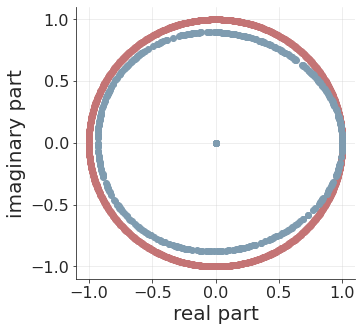

In [33]:
fname = 'max_eigenvector.pdf'

# normalize
vec_W_norm = vec_W_max[rescale_ind, perc_ind, shift_ind, seed_ind,:] / np.abs(vec_W_max[rescale_ind, perc_ind, shift_ind, seed_ind,:]).max()
vec_PW_norm = vec_PW_max[rescale_ind, perc_ind, shift_ind, seed_ind,:] / np.abs(vec_PW_max[rescale_ind, perc_ind, shift_ind, seed_ind,:]).max()
vec_Wr_norm = vec_Wr_max[rescale_ind, perc_ind, shift_ind, seed_ind,:] / np.abs(vec_Wr_max[rescale_ind, perc_ind, shift_ind, seed_ind,:]).max()

fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(vec_W_norm.real, vec_W_norm.imag, color=palette[0])
plt.scatter(vec_PW_norm.real, vec_PW_norm.imag, color=palette[1])
#plt.scatter(vec_Wr_norm.real, vec_Wr_norm.imag)

plt.xlabel('real part', fontsize=labelsize)
plt.ylabel('imaginary part', fontsize=labelsize)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

## Fig 2g: Quantifying the deformation of the principal eigenvector

In [34]:
def compute_radius(vec_PW_norm):
    x = vec_PW_norm[vec_PW_norm!=0].real
    y = vec_PW_norm[vec_PW_norm!=0].imag

    gz = y >=0
    y_p = y[gz]
    x_p = x[gz]
    f_p = interpolate.interp1d(x_p, y_p)

    gz = y <=0
    y_n = y[gz]
    x_n = x[gz]
    f_n = interpolate.interp1d(x_n, y_n)

    real_radius = (np.abs(np.mean([np.max(x_p), np.max(x_n)])) + np.abs(np.mean([np.min(x_p), np.min(x_n)]))) / 2
    imag_radius = (np.abs(f_p(0)) + np.abs(f_n(0))) / 2
    
    return real_radius, imag_radius

In [35]:
min_radius_PW = np.zeros((n_perc_sel, n_shifts, n_seeds))
real_radius_PW = np.zeros((n_perc_sel, n_shifts, n_seeds))
imag_radius_PW = np.zeros((n_perc_sel, n_shifts, n_seeds))

# compute difference between principle eigenvector of W and PW
for k, p in enumerate(perc_selectivity):
    for i, s in enumerate(shift_percent):
        for j, seed in enumerate(seeds):

            vec_W_norm = vec_W_max[rescale_ind,k,i,j,:] / np.abs(vec_W_max[rescale_ind,k,i,j,:]).max()
            vec_PW_norm = vec_PW_max[rescale_ind,k,i,j,:] / np.abs(vec_PW_max[rescale_ind,k,i,j,:]).max()
            vec_Wr_norm = vec_Wr_max[rescale_ind,k,i,j,:] / np.abs(vec_Wr_max[rescale_ind,k,i,j,:]).max()

            min_radius_PW[k,i,j] = np.min(np.abs(vec_PW_norm[vec_PW_norm!=0]))

            real_radius_PW[k,i,j], imag_radius_PW[k,i,j] = compute_radius(vec_PW_norm)

In [36]:
min_radius_PW_sel = min_radius_PW[:,shift_ind,:]
real_radius_PW_sel = real_radius_PW[:,shift_ind,:]
imag_radius_PW_sel = imag_radius_PW[:,shift_ind,:]

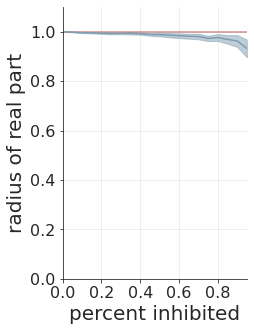

In [37]:
fname = 'max_eigenvector_real_radius.pdf'

fig, ax = plt.subplots(figsize=(3.3,5))
plt.plot(perc_selectivity, np.ones(n_perc_sel), color=palette[0], alpha=0.8)#linestyle='--', color='dimgrey')

plt.plot(perc_selectivity, real_radius_PW_sel.mean(axis=1), color=palette[1])
plt.fill_between(perc_selectivity, 
                 real_radius_PW_sel.mean(axis=1)-real_radius_PW_sel.std(axis=1),
                 real_radius_PW_sel.mean(axis=1)+real_radius_PW_sel.std(axis=1),
                 color=palette[1],
                 alpha=0.5)
#plt.title('Estimated radius on real axis')
plt.xlim(0,.95)
plt.ylim(0,1.1)

plt.xlabel('percent inhibited', fontsize=labelsize)
plt.ylabel('radius of real part', fontsize=labelsize)
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

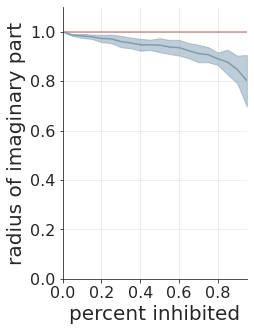

In [38]:
fname = 'max_eigenvector_imag_radius.pdf'

fig, ax = plt.subplots(figsize=(3.3,5))
plt.plot(perc_selectivity, np.ones(n_perc_sel), color=palette[0], alpha=0.8) #linestyle='--', color='dimgrey')

plt.plot(perc_selectivity, imag_radius_PW_sel.mean(axis=1), color=palette[1])
plt.fill_between(perc_selectivity, 
                 imag_radius_PW_sel.mean(axis=1)-imag_radius_PW_sel.std(axis=1),
                 imag_radius_PW_sel.mean(axis=1)+imag_radius_PW_sel.std(axis=1),
                 color=palette[1],
                 alpha=0.5)
#plt.title('Estimated radius on imaginary axis')
plt.xlim(0,.95)
plt.ylim(0,1.1)

plt.xlabel('percent inhibited', fontsize=labelsize)
plt.ylabel('radius of imaginary part', fontsize=labelsize)
ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8])
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

### (additional) Bump size determined by principal eigenvector

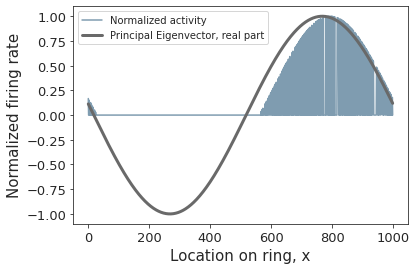

In [39]:
plt.figure()
plt.plot(net.R[:,6]/np.max(net.R[:,6]), color=palette[1], label='Normalized activity')
plt.plot(np.arange(0,N,1), vec_W_norm.real, color='dimgrey', linewidth=3, label='Principal Eigenvector, real part')
plt.xlabel('Location on ring, x', fontsize=15)
plt.ylabel('Normalized firing rate', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.show()

## Supplement: Reduced matrices

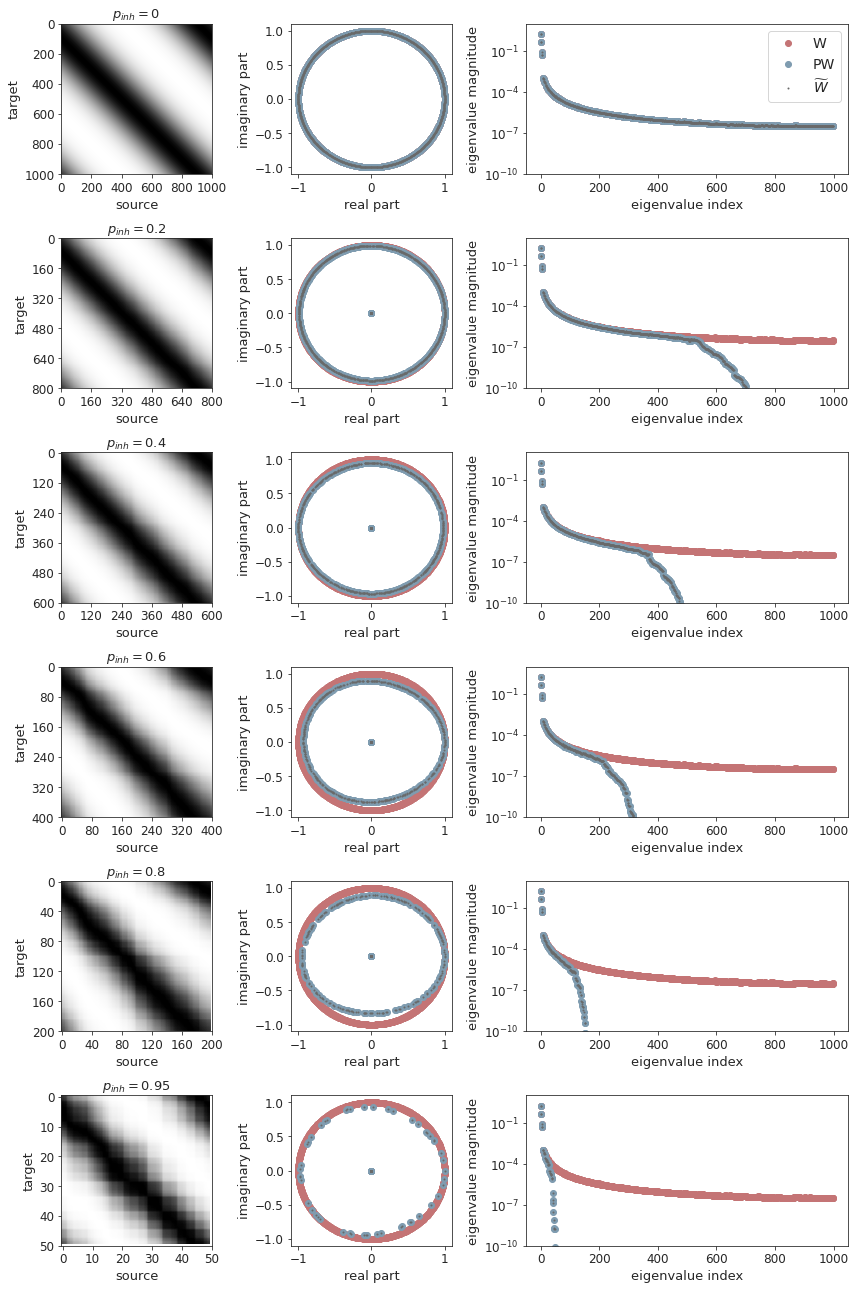

In [40]:
fname = 'figure_S4.pdf'

fig, ax = plt.subplots(nrows=6, ncols=3, figsize=(12,18), 
                       gridspec_kw={'width_ratios': [1, 1, 2]})

perc_exs = [0, .2, .4, .6, .8, .95]

for i, perc_ex in enumerate(perc_exs):
    
    # PART 1: REDUCED WEIGHT MATRIX
    
    # parameter setting to load
    parameter_setting = (rescale_val, perc_ex, seed_val, shift_val) + static_parameters

    # load data from file
    net = manage.load_data(parameter_setting)

    # extract weight matrix and P matrix
    W = net.W
    P = net.P

    # compute PW
    PW = np.diag(P)@W

    # make reduced row-column matrix
    W_reduced = W[P.astype(bool), :]
    W_reduced = W_reduced[:, P.astype(bool)]
    im = ax[i, 0].imshow(W_reduced, cmap='gray_r')
    n_neurons = np.shape(W_reduced)[0]
    ax[i, 0].set_xticks(np.linspace(0, n_neurons, 6))
    ax[i, 0].set_yticks(np.linspace(0, n_neurons, 6))

    # formatting
    ax[i,0].tick_params(labelsize=12)
    ax[i,0].set_xlabel('source', fontsize=13)
    ax[i,0].set_ylabel('target', fontsize=13)
    ax[i,0].set_title('$p_{inh} = $' + str(perc_ex), fontsize=13)
    
    # PART 2: EIGENVECTORS
    
    perc_ex_ind = np.where(perc_selectivity == perc_ex)[0][0]
    
    # normalize
    vec_W_norm = vec_W_max[rescale_ind, perc_ind, shift_ind, seed_ind,:] / np.abs(vec_W_max[rescale_ind, perc_ind, shift_ind, seed_ind,:]).max()
    vec_PW_norm = vec_PW_max[rescale_ind, perc_ex_ind, shift_ind, seed_ind,:] / np.abs(vec_PW_max[rescale_ind, perc_ex_ind, shift_ind, seed_ind,:]).max()
    vec_Wr_norm = vec_Wr_max[rescale_ind, perc_ex_ind, shift_ind, seed_ind,:] / np.abs(vec_Wr_max[rescale_ind, perc_ex_ind, shift_ind, seed_ind,:]).max()

    ax[i,1].scatter(vec_W_norm.real, vec_W_norm.imag, color=palette[0])
    ax[i,1].scatter(vec_PW_norm.real, vec_PW_norm.imag, color=palette[1])
    ax[i,1].scatter(vec_Wr_norm.real, vec_Wr_norm.imag, color='dimgrey', s=1)
    
    # formatting
    ax[i,1].tick_params(labelsize=12)
    ax[i,1].set_xlabel('real part', fontsize=13)
    ax[i,1].set_ylabel('imaginary part', fontsize=13)
    
    # PART 3: EIGENVALUES
    
    # eigenvalue magnitude of weight matrix, W
    ax[i,2].plot(abs(evals_W[no_rescale_ind, perc_ex_ind, shift_ind, seed_ind]), 'o', c=palette[0], label='W')

    # eigenvalue magnitude of PW
    ax[i,2].plot(abs(evals_PW[rescale_ind, perc_ex_ind, shift_ind, seed_ind]), 'o', c=palette[1], label='PW')
    ax[i,2].plot(abs(evals_Wr[rescale_ind, perc_ex_ind, shift_ind, seed_ind]), 'o', c='dimgrey', markersize=1,label='$\widetilde W$')

    # formatting plot
    ax[i,2].set_ylim(10**-10, 10)
    ax[i,2].set_yscale('log')
    ax[i,2].tick_params(labelsize=12)
    ax[i,2].set_xlabel('eigenvalue index', fontsize=13)
    ax[i,2].set_ylabel('eigenvalue magnitude', fontsize=13)
    
    if i == 0:
        leg = ax[i, 2].legend(fontsize=14, scatterpoints=1)
    
plt.tight_layout(pad=1)

if save_figs_flag:
    plt.savefig(fig_dir_supplement+fname, bbox_inches="tight")
plt.show()

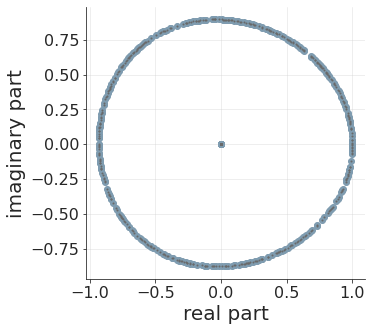

In [41]:
# normalize
vec_W_norm = vec_W_max[rescale_ind, perc_ind, shift_ind, seed_ind,:] / np.abs(vec_W_max[rescale_ind, perc_ind, shift_ind, seed_ind,:]).max()
vec_PW_norm = vec_PW_max[rescale_ind, perc_ind, shift_ind, seed_ind,:] / np.abs(vec_PW_max[rescale_ind, perc_ind, shift_ind, seed_ind,:]).max()
vec_Wr_norm = vec_Wr_max[rescale_ind, perc_ind, shift_ind, seed_ind,:] / np.abs(vec_Wr_max[rescale_ind, perc_ind, shift_ind, seed_ind,:]).max()

fig, ax = plt.subplots(figsize=(5,5))
#plt.scatter(vec_W_norm.real, vec_W_norm.imag, color=palette[0])
plt.scatter(vec_PW_norm.real, vec_PW_norm.imag, color=palette[1])
plt.scatter(vec_Wr_norm.real, vec_Wr_norm.imag, color='dimgrey', s=1)

plt.xlabel('real part', fontsize=labelsize)
plt.ylabel('imaginary part', fontsize=labelsize)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)

## Bump statistics

Here we fit a Gaussian to the activity at each time point to determine
- bump speed
- bump amplitude
- bump width

#### Activity over time

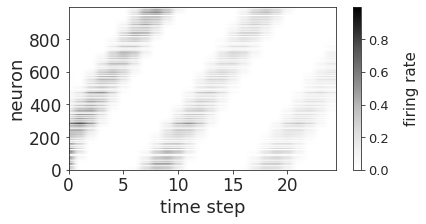

In [42]:
parameter_setting = (rescale_val, perc_val, seed_val, shift_val) + static_parameters
net = manage.load_data(parameter_setting)

plotter = Plot()
plotter.activity_raster(net.R) #, storage_loc=figure_dir+'exc_activity_raster_p=0.3,seed=6,transient,projection.pdf')

#### Activity at one time point

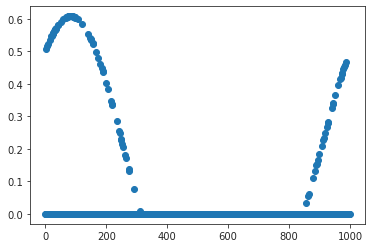

In [43]:
parameter_setting = (True, 0.8, 1, .1) + static_parameters
net = manage.load_data(parameter_setting)
R = net.R
P = net.P

t = 9
plt.figure()
plt.scatter(np.arange(0,1000,1), R[:,t])
plt.show()

### Method: fitting gaussian to bump (taking periodic boundary into account)

- concatenate the activity multiple times (e.g. 3 times, depends on sigma)
- find the peaks
- choose the first peak that is "far away enough" (e.g. 3 std or perhaps N/2 points) from each edge
- take N/2 data points on each side of this center
- the actual center is the new center mod N (but better to take center of fitted gaussian)

This still has uncertainty coming from where the center is located due to inhibited neurons. The expectation is that the center will be off proportional to the number of silenced neurons.

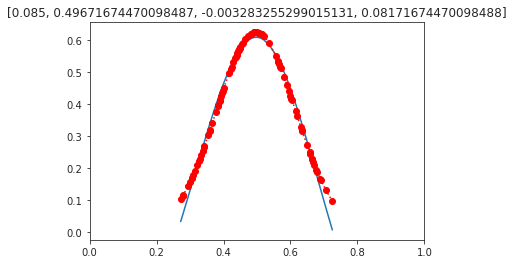

In [44]:
buffer = int(N/2)
left_bound = 0
right_bound = 3*N

def gaussian(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))


R_padded = np.concatenate([R[:,t],R[:,t],R[:,t]])
max_indices = np.where(R_padded == R_padded.max())[0]
R_argmax = max_indices[np.where((max_indices - buffer > left_bound) & (max_indices + buffer < right_bound))[0][0]]
estimated_center = R_argmax % N

x = np.arange(0,1,1/N)
y = R_padded[R_argmax-int(N/2):R_argmax+int(N/2)]

non_zero_entries = y!=0
x = x[non_zero_entries]
y = y[non_zero_entries]

n = len(x)                          #the number of data
mean = sum(x*y)/n                   #note this correction
sigma = sum(y*(x-mean)**2)/n        #note this correction

try:
    popt,pcov = curve_fit(gaussian, x, y, bounds=([0,0,0], [100, 1, 20]), maxfev=5000)
except RuntimeError:
    popt = [-10, -10, -10]
    print('didnt find solution')

discrepancy = popt[1] - .5
    
plt.figure()
plt.plot(x, y)
plt.plot(x, gaussian(x,*popt),'ro:',label='fit')
plt.title([estimated_center/N, popt[1], discrepancy, estimated_center/N + discrepancy])
plt.xlim(0,1)
plt.show()

Text(0.5, 1.0, '[  85 1085 2085]')

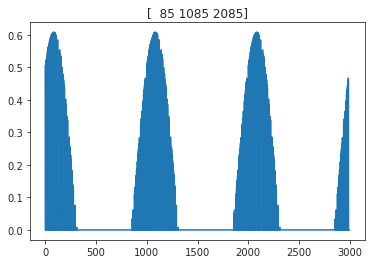

In [45]:
test = np.concatenate([R[:,t],R[:,t],R[:,t]])
plt.plot(test)
#plt.xlim(1500,1530)
#plt.ylim(1.1,1.2)
plt.title(str(np.where(test == test.max())[0]))

In [46]:
buffer = int(N/2)
max_indices = np.where(test == test.max())[0]
test_center = max_indices[np.where((max_indices - buffer > 0) & (max_indices + buffer < 3*N))[0][0]]

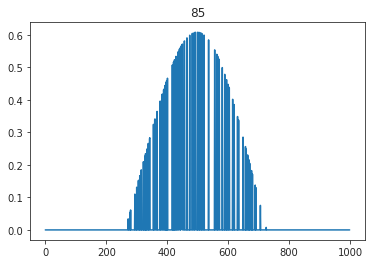

In [47]:
plt.figure()
plt.plot(test[test_center-int(N/2):test_center+int(N/2)])
plt.title(test_center % N)
plt.show()

## Analysis: fit Gaussian and get amplitude, speed, width for each simulation

In [48]:
# number of time steps starting from second timestep (remove initialization)
t_0 = 1
n_timesteps = T - t_0

buffer = int(N/2)
left_bound = 0
right_bound = 3*N

# 1 to compute, 0 to load from file
compute_activity_statistics = 0

### Compute and store / load data

In [49]:
# if true, compute and store data
if compute_activity_statistics == 1:

    # initialize arrays to store the amplitudes, centers, widths of the fitted gaussian
    amplitudes = np.zeros((n_perc_sel, n_shifts, n_seeds, n_timesteps))
    centers = np.zeros((n_perc_sel, n_shifts, n_seeds, n_timesteps))
    sigmas = np.zeros((n_perc_sel, n_shifts, n_seeds, n_timesteps))
    dist_travelled = np.zeros((n_perc_sel, n_shifts, n_seeds, n_timesteps-1))

    # normalized root mean square error, measure goodness of fit
    nrmse = np.zeros((n_perc_sel, n_shifts, n_seeds, n_timesteps))

    # defines Gaussian which we fit to the activity bump at each timestep
    def gaussian(x,a,x0,sigma):
        return a*np.exp(-(x-x0)**2/(2*sigma**2))

    # loop over percent inhibition, percent shift, and trials (i.e. seeds)
    for k, p in enumerate(perc_selectivity):
        for i, s in enumerate(shift_percent):
            for j, seed in enumerate(seeds):

                # build parameter tuple, point in parameter space
                parameter_setting = (rescale_val, p, seed, s) + static_parameters

                # load network instance belonging to that parameter setting
                net = manage.load_data(parameter_setting)

                # extract activity 
                R = net.R

                # loop through each time step to fit gaussian and extract amplitude, center, and width
                for t in range(n_timesteps):

                    # select timestep t, offset by t_0 (to skip initialization t=0)
                    t_sel = t + t_0 
                    R_padded = np.concatenate([R[:,t_sel],R[:,t_sel],R[:,t_sel]])
                    max_indices = np.where(R_padded == R_padded.max())[0]
                    R_argmax = max_indices[np.where((max_indices - buffer > left_bound) & (max_indices + buffer < right_bound))[0][0]]
                    estimated_center = R_argmax % N

                    x = np.arange(0,1,1/N)
                    y = R_padded[R_argmax-int(N/2):R_argmax+int(N/2)]

                    non_zero_entries = y!=0
                    x = x[non_zero_entries]
                    y = y[non_zero_entries]

                    #n = len(x)                          #the number of data
                    #mean = sum(x*y)/n                   #note this correction
                    #sigma = sum(y*(x-mean)**2)/n        #note this correction

                    try:
                        popt,pcov = curve_fit(gaussian, x, y, bounds=([0,0,0], [100, 1, 20]), maxfev=5000)
                    except RuntimeError:
                        popt = [-10, -10, -10]
                        print('didnt find solution')

                    # first we centered the activity around the computed argmax of firing rate distribution
                    # then we computed a gaussian fit
                    # if the original peak were the true center, we should get 0.5 for the center of the gaussian
                    # anything else is a discrepancy that we need to add back onto the original estimated center
                    discrepancy = popt[1] - 0.5

                    amplitudes[k,i,j,t] = popt[0]
                    centers[k,i,j,t] = (estimated_center/N + discrepancy) % 1  # mod 1 here since coordinates x in [0,1]
                    sigmas[k,i,j,t] = popt[2]

                    # store goodness of fit as normalised root mean square error
                    nrmse[k,i,j,t] = np.sqrt(np.sum((y - gaussian(x,*popt))**2) / len(x)) / max(y)

                    if t>0:
                        current_center = centers[k,i,j,t]
                        last_center = centers[k,i,j,t-1]
                        dist = np.abs(current_center - last_center)

                        # distance on ring, if crossing 0 then dist>0.5, so real dist is 1-dist
                        #if dist > 0.5:
                        #    dist = 1 - dist
                        dist_travelled[k,i,j,t-1] = np.minimum(dist, 1-dist)

                    print('\rCurrent setting: ' + str(parameter_setting), end='')
                
    # store data
    manage.save(amplitudes, 'amplitudes', manage.bump_dir)
    manage.save(centers, 'centers', manage.bump_dir)
    manage.save(sigmas, 'sigmas', manage.bump_dir)
    manage.save(dist_travelled, 'dist_travelled', manage.bump_dir)
    manage.save(nrmse, 'nrmse', manage.bump_dir)
    
    print('Data stored in ' + manage.bump_dir)
    
# otherwise load the data
else:
    amplitudes = manage.load('amplitudes', manage.bump_dir)
    centers = manage.load('centers', manage.bump_dir)
    sigmas = manage.load('sigmas', manage.bump_dir)
    dist_travelled = manage.load('dist_travelled', manage.bump_dir)
    nrmse = manage.load('nrmse', manage.bump_dir)
    
    print('Data loaded from ' + manage.bump_dir)

Data loaded from /home/andrew/Documents/projects/submanifolds/subspace_projections_with_selective_inhibition/rate_network/data/weight_matrix_exp_2025-04-15_08:53:39/bump_statistics/


### Bump speed

In [50]:
dist_travelled_centered = np.zeros((n_perc_sel, n_shifts, n_seeds, n_timesteps-1))
amplitudes_centered = np.zeros((n_perc_sel, n_shifts, n_seeds, n_timesteps))
sigmas_centered = np.zeros((n_perc_sel, n_shifts, n_seeds, n_timesteps))
for k, p in enumerate(perc_selectivity):
    for i, s in enumerate(shift_percent):
        for j, seed in enumerate(seeds):
            dist_travelled_centered[k,i,j,:] = (dist_travelled[k,i,j,:] - dist_travelled[0,i,j,:]) / dist_travelled[0,i,j,:]
            amplitudes_centered[k,i,j,:] = (amplitudes[k,i,j,:] - amplitudes[0,i,j,:]) / amplitudes[0,i,j,:]
            sigmas_centered[k,i,j,:] = (sigmas[k,i,j,:] - sigmas[0,i,j,:]) / sigmas[0,i,j,:]

In [51]:
avg_speed_over_time = np.mean(dist_travelled_centered, axis=3)
std_speed_over_time = np.std(dist_travelled_centered, axis=3)

mean_speed = avg_speed_over_time.mean(axis=2)
std_speed = np.sqrt((std_speed_over_time**2).mean(axis=2))

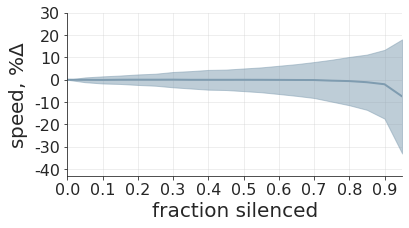

In [52]:
fname = 'bump_speed.pdf'

fig, ax = plt.subplots(figsize=(6,3))
plt.plot(perc_selectivity, mean_speed[:,shift_ind], color=palette[1], linewidth=2)
plt.fill_between(perc_selectivity,
                 mean_speed[:,shift_ind]-std_speed[:,shift_ind], 
                 mean_speed[:,shift_ind]+std_speed[:,shift_ind],
                 color=palette[1],
                 alpha=0.5
                )
#plt.xlim(0,)
plt.xlim(0,.95)
plt.ylim(-0.43,0.3)
plt.xlabel('fraction silenced', fontsize=labelsize)
plt.ylabel('speed, %$\Delta$', fontsize=labelsize)
ax.set_xticks(np.arange(0,1, 0.1))
ax.set_yticks(np.arange(-.4,.4, 0.1), np.arange(-40,40, 10))
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

### (additional) Distance travelled after T timesteps

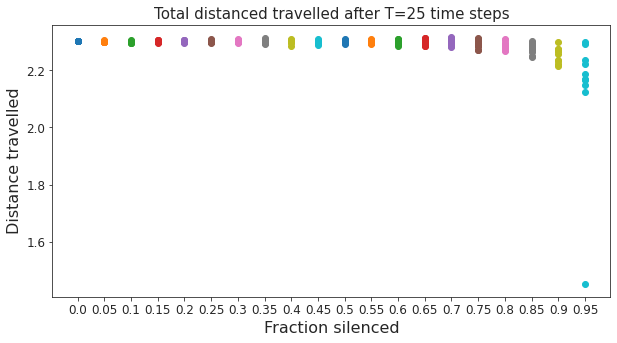

In [53]:
plt.figure(figsize=(10,5))
#percent inhibition, percent shift, and trials (i.e. seeds)
k = 24
for p in range(n_perc_sel):
    plt.scatter(p*np.ones(n_seeds), np.sum(dist_travelled[p,shift_ind,:,:k], axis=1))

plt.xticks(np.arange(0, n_perc_sel,1), perc_selectivity, fontsize=12) 
plt.xlabel('Fraction silenced', fontsize=16)
plt.yticks(fontsize=12) 
plt.ylabel('Distance travelled', fontsize=16)
plt.title('Total distanced travelled after T=25 time steps', fontsize=15)
plt.show()
#plt.ylim(1.8,2.4)

## Bump amplitude

In [54]:
avg_amplitude_over_time = np.mean(amplitudes_centered, axis=3)
std_amplitude_over_time = np.std(amplitudes_centered, axis=3)

mean_amplitude = avg_amplitude_over_time.mean(axis=2)
std_amplitude = np.sqrt((std_amplitude_over_time**2).mean(axis=2))

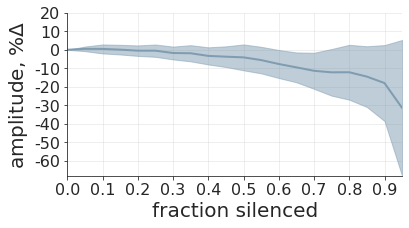

In [55]:
fname = 'bump_amplitude.pdf'

fig, ax = plt.subplots(figsize=(6,3))
plt.plot(perc_selectivity, mean_amplitude[:,shift_ind], color=palette[1], linewidth=2)
plt.fill_between(perc_selectivity,
                 mean_amplitude[:,shift_ind]-std_amplitude[:,shift_ind], 
                 mean_amplitude[:,shift_ind]+std_amplitude[:,shift_ind],
                 color=palette[1],
                 alpha=0.5
                )
plt.xlabel('fraction silenced', fontsize=labelsize)
plt.ylabel('amplitude, %$\Delta$', fontsize=labelsize)
ax.set_xticks(np.arange(0,1, 0.1))
ax.set_yticks(np.arange(-.7,.3, .1), np.arange(-70,30, 10))
plt.xlim(0,.95)
plt.ylim(-0.68,.2)
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()

## Bump width

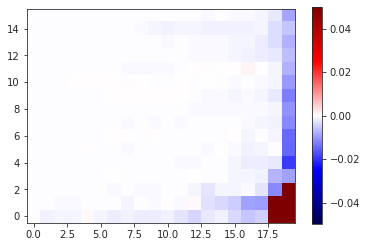

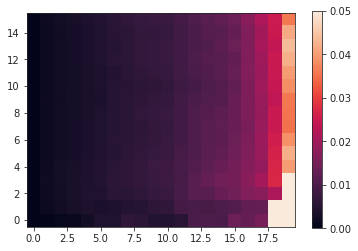

In [56]:
avg_sigma_over_time = sigmas_centered.mean(axis=3)
std_sigma_over_time = sigmas_centered.std(axis=3)

mean_sigma = avg_sigma_over_time.mean(axis=2)
std_sigma = np.sqrt((std_sigma_over_time**2).mean(axis=2))

plt.figure()
plt.imshow(mean_sigma.T, origin='lower', cmap='seismic', vmin=mean_sigma[0,0]-.05, vmax=mean_sigma[0,0]+.05)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(std_sigma.T, origin='lower', vmax=0.05)
plt.colorbar()
plt.show()

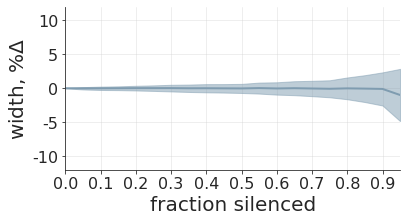

In [57]:
fname = 'bump_width.pdf'

fig, ax = plt.subplots(figsize=(6,3))
plt.plot(perc_selectivity, mean_sigma[:,shift_ind],color=palette[1], linewidth=2)
plt.fill_between(perc_selectivity,
                 mean_sigma[:,shift_ind]-std_sigma[:,shift_ind], 
                 mean_sigma[:,shift_ind]+std_sigma[:,shift_ind],
                 color=palette[1],
                 alpha=0.5
                )
plt.xlim(0,.95)
plt.ylim(-.12, .12)
plt.xlabel('fraction silenced', fontsize=labelsize)
plt.ylabel('width, %$\Delta$', fontsize=labelsize)
ax.set_xticks(np.arange(0,1, 0.1))
ax.set_yticks(np.arange(-.1,.15, .05), np.arange(-10,15, 5))
ax.tick_params(axis='both', which='major', labelsize=ticksize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=0.4)

if save_figs_flag:
    plt.savefig(fig_dir+fname, bbox_inches="tight")
plt.show()